# **Title : "House Price Prediction" by Hrushik Perumalla (GH1032261)**



# Problem Statement

One of the most significant issues when it comes to real estate pricing is that price determination is not easy because a number of factors come into play including house dimensions, the number of rooms, house age, size of the lot, and quality of the neighborhood. A good solution for house price prediction can assist real estate agents and property developers in making good strategic decisions on pricing in order to avoid underpricing or overpricing their homes and adapt to the competitive market positions (Truong et al. 2020). Solving this problem helps the company by enhancing the accuracy of the prices offered to customers and therefore the profitability of the company. Data can be obtained from property listing sites or housing registers or even property records. Stating this in the context of a machine learning problem is, training a regression model on the house data to forecast the house prices based on the property characteristics. Real estate are one of the most risky assets that are very sensitive to changes in various factors and the location. They may include the over-all state of the economy, demography, interest rate or even a change in political policies at the regional level (Ullah et al. 2023). At other times, it is also influenced by speculation or fluctuations in investors’ confidence in the geography of the investment target. Effective house price prediction assists real estate agents in sticking to the market-competitive price since the prices could change over a very short time. This information can be helpful for long-term predictive planning for property developers especially for the urban areas where new projects of housing require precise evaluation in terms of profitability. In addition, due to higher levels of transparency in pricing, property purchasers including first-time buyers are in a better position to make informed decisions on some aspects of personal finance (Larsen et al. 2022). The business case for accurate house price prediction is compelling: by closely linking price models to market conditions that are adjusted for either under or overpricing potential, the loss-making experience through underpricing or the adverse market reputation that may be occasioned by overpricing may be averted.

Business Scenario in Overview : The goal is to predict the selling price of residential properties based on various attributes such as square footage, number of bedroom and bathrooms, year built, lot size, and neighbourhood quality.


Article title
House Price Regression Dataset

URL
https://www.kaggle.com/datasets/prokshitha/home-value-insights/data

Website title
Kaggle

Date accessed
September 23, 2024

Date published
September 06, 2024

# Dataset Description
This dataset provides the details of real estate of 1000 properties and includes features that impact house pricing. It includes columns for "Square_Footage", which measures the living space of each property, and "Num_Bedrooms" and "Num_Bathrooms", denoting the number of bedrooms and bathrooms, respectively.

The "Year_Built" column indicates the construction year of each property, while "Lot_Size" captures the total land area the house occupies. The "Garage_Size" column shows the number of cars that can fit into the garage, reflecting storage capacity.

A "Neighborhood_Qual" column offers a rating or index representing the overall quality of the neighborhood, possibly based on factors such as safety, amenities, or desirability. The final column, "House_Price", provides the market price of each property, possibly in USD.

It is beneficial to study the extent to which properties’ characteristics affect the price of the houses in the real estate market, such as place and area of houses.

# Data exploration

The data set for this project contains features that characterize houses and residential properties. The first improvement to the initial exploration is to emphasize the temporal characteristics of the dataset, including how house prices change with time in regions. Looking at the data over the timeline may be useful in identifying seasonal variations in the prices or how the economic environment affects the property market in the given areas. Moreover, it would be useful to categorise properties according to their location so as to recognize areas where certain property characteristics (for instance, size, or neighborhood quality) tend to have a more pronounced effect on price levels (Zhao et al. 2021).
Regarding outliers, it is quite sensible to make an observation of price-extraordinary houses at the higher end of the distribution. But if one could extract further insights as to why these numbers are out of range, it would be possible to find subtle economic or social changes or effects like the increases in new luxuries in some areas or other forms of gentrification for instance. It is possible to filter luxury homes from other kinds of homes through clustering enabling the model to distinguish between various property types properly (Smith et al. 2020).


Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

The first line of the code which imports the important and necessary libraries namely pandas, numpy, matplotlib and seaborn for the handling and preparation of data and drawing of visualization. Also, there are libraries utilized for the models like Scikit-learn for machine learning. This is very important to ascertain that all the relevant tools required for data preprocessing, model training as well as model evaluation are well provided. By structuring these imports up front the code is kept clean and more easily modified for changes in datasets or models.

# Loading and Reading Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving house_price_regression_dataset.csv to house_price_regression_dataset (1).csv


In [ ]:
data = pd.read_csv("house_price_regression_dataset.csv")

In [ ]:
data.head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


The dataset contains 1000 records which depict the details of a piece of residential property with features such as area size, number of bedrooms, number of bathrooms, year of construction, size of the plot, size of the garage, and the quality of the neighborhood in question. It is noted that there is only one dependent variable, which is house price that has to be predicted.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


# Data Cleaning

In [ ]:
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


In [ ]:
# Handling missing values (if any)
data = data.dropna()
print(data)

     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0              1360             2              1        1981  0.599637   
1              4272             3              3        2016  4.753014   
2              3592             1              2        2016  3.634823   
3               966             1              2        1977  2.730667   
4              4926             2              1        1993  4.699073   
..              ...           ...            ...         ...       ...   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality   House_Price  
0              0                     5  2.623829e+05  
1

# Descriptive Statistics

In [ ]:
 data.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


After the first look at the given features of the dataset, it seems that the data is pretty clean, there is no much missing data, and there are also no many categorical variables that have to be encoded. However, one has to understand that some outliers may be there. This figure display mean standard deviation min-max for all the numerical variables in the dataset. These save us the time to go through the dataset, and any extreme values or skewed distributions come easily to our notice. For instance, the variation of the minimum and the maximum house prices shows that the high-end house prices may skew the overall prediction of the houses.

# Exploratory Data Analysis

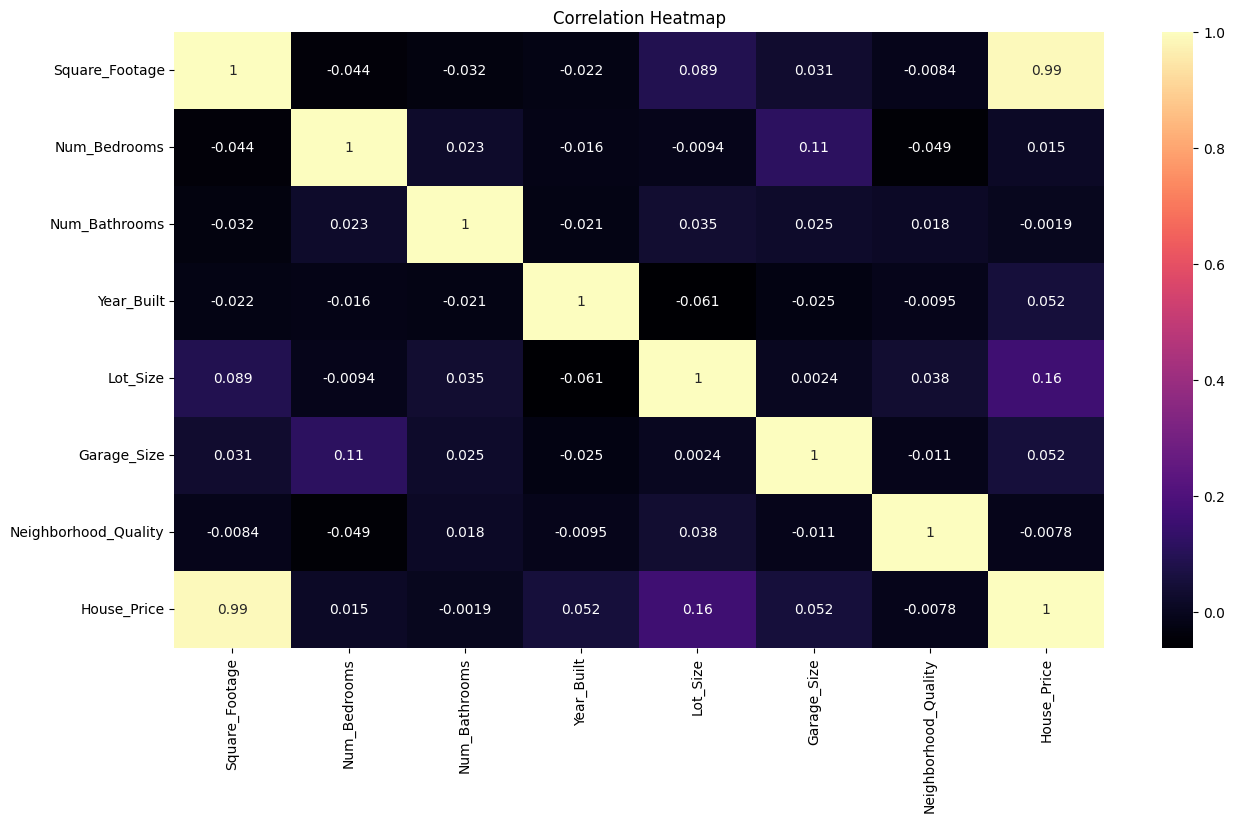

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="magma")
plt.title('Correlation Heatmap')
plt.show()

The above visualization used is the correlation heatmap through which one can comprehend how different features are related to the house price (Mora-Garcia et al. 2022). The results for the correlation analysis indicates that the house price has a significant positive relationship with the size of the house, however, the quality of the neighbor hood has a rather insignificant negative relationship with the price of the house. The correlation heatmap provides an idea of the kind of relationship that exists between the features and target variable, which is the price of the houses. The strength of the correlations is reflected by the shades with darker ones indicating stronger correlation and lighter ones thus reflecting weaker correlations. A simple statistical measure such as coefficient of correlation is used to examine which of the features – area, number of bedrooms and so on, influence the price of the houses most. Unfortunately, the relationship between neighborhood quality and price is not simple and this is why it is negative; the model has to cater for it.

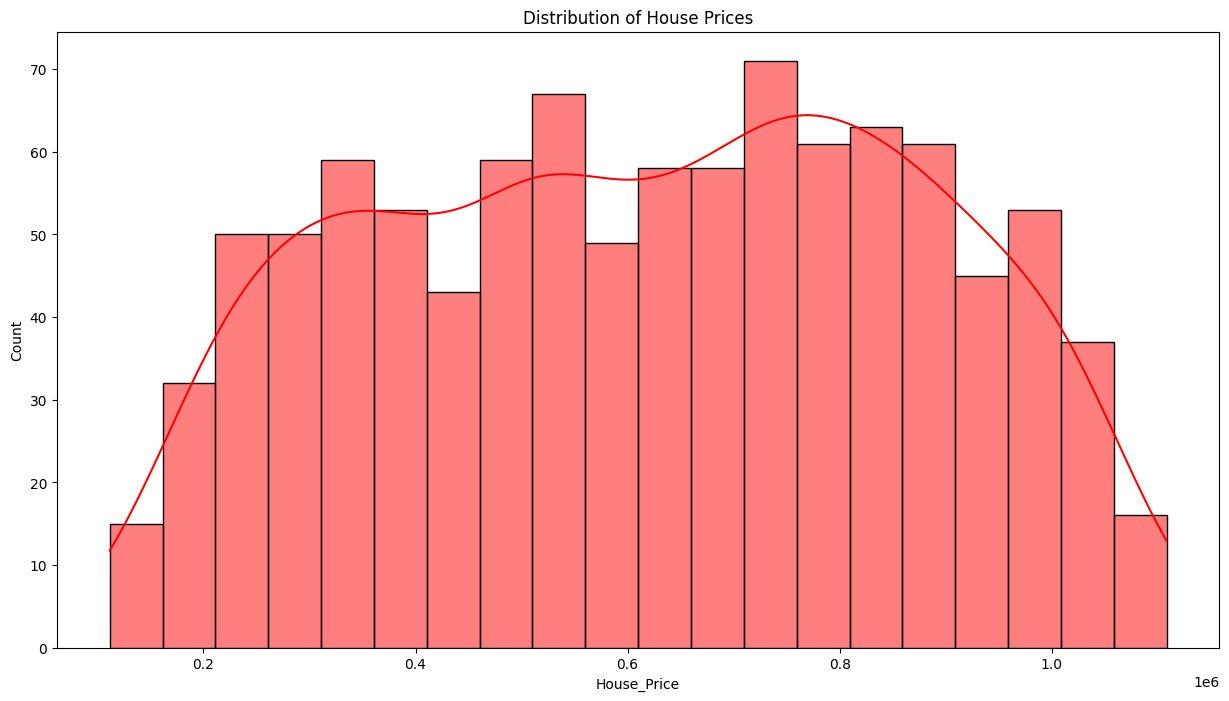

In [ ]:
# Distribution of House Prices
plt.figure(figsize=(15,8))
sns.histplot(data['House_Price'], kde=True, bins=20,color="red")
plt.title('Distribution of House Prices')
plt.show()

The histogram gives information about the house prices. It can be looked at and seems to be positively skewed meaning that there are a few luxurious houses that can move the average to the right. This is also further evidenced by the overlaid density curve above as it displays a higher density on the right end. The bar chart in this figure provides the frequency distribution of house price data in the data set which indicates that it is positively skewed. This is just in light of contributing the mean price by a small number of high end luxury homes. The overlaid density curve also provides a further support of this position through depicting a skewed distribution. Why understanding this distribution is important, because indicates that to exclude potential log transforms or other scaling methods are needed to balance out the majority of data to not encounter model bias towards luxury apartments.

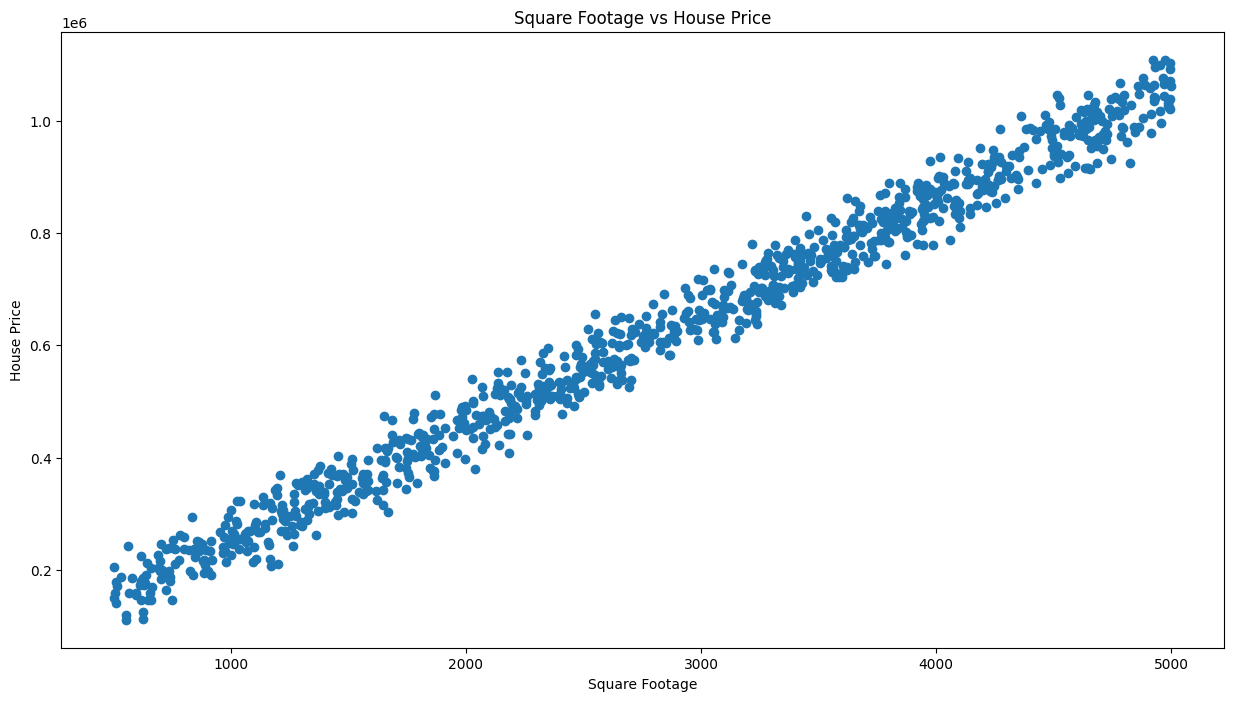

In [ ]:
# Square Footage vs House Price
plt.figure(figsize=(15,8))
plt.scatter(data['Square_Footage'], data['House_Price'])
plt.title('Square Footage vs House Price')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.show()


According to the scatter diagram, the correlation between square footage and house price can be complimentarily said to be strong and positively proportional to the straight line. To some extent, size is a factor to consider when deciding the price of a house because as the size of the house in terms of square footage increases, the price likewise increases.

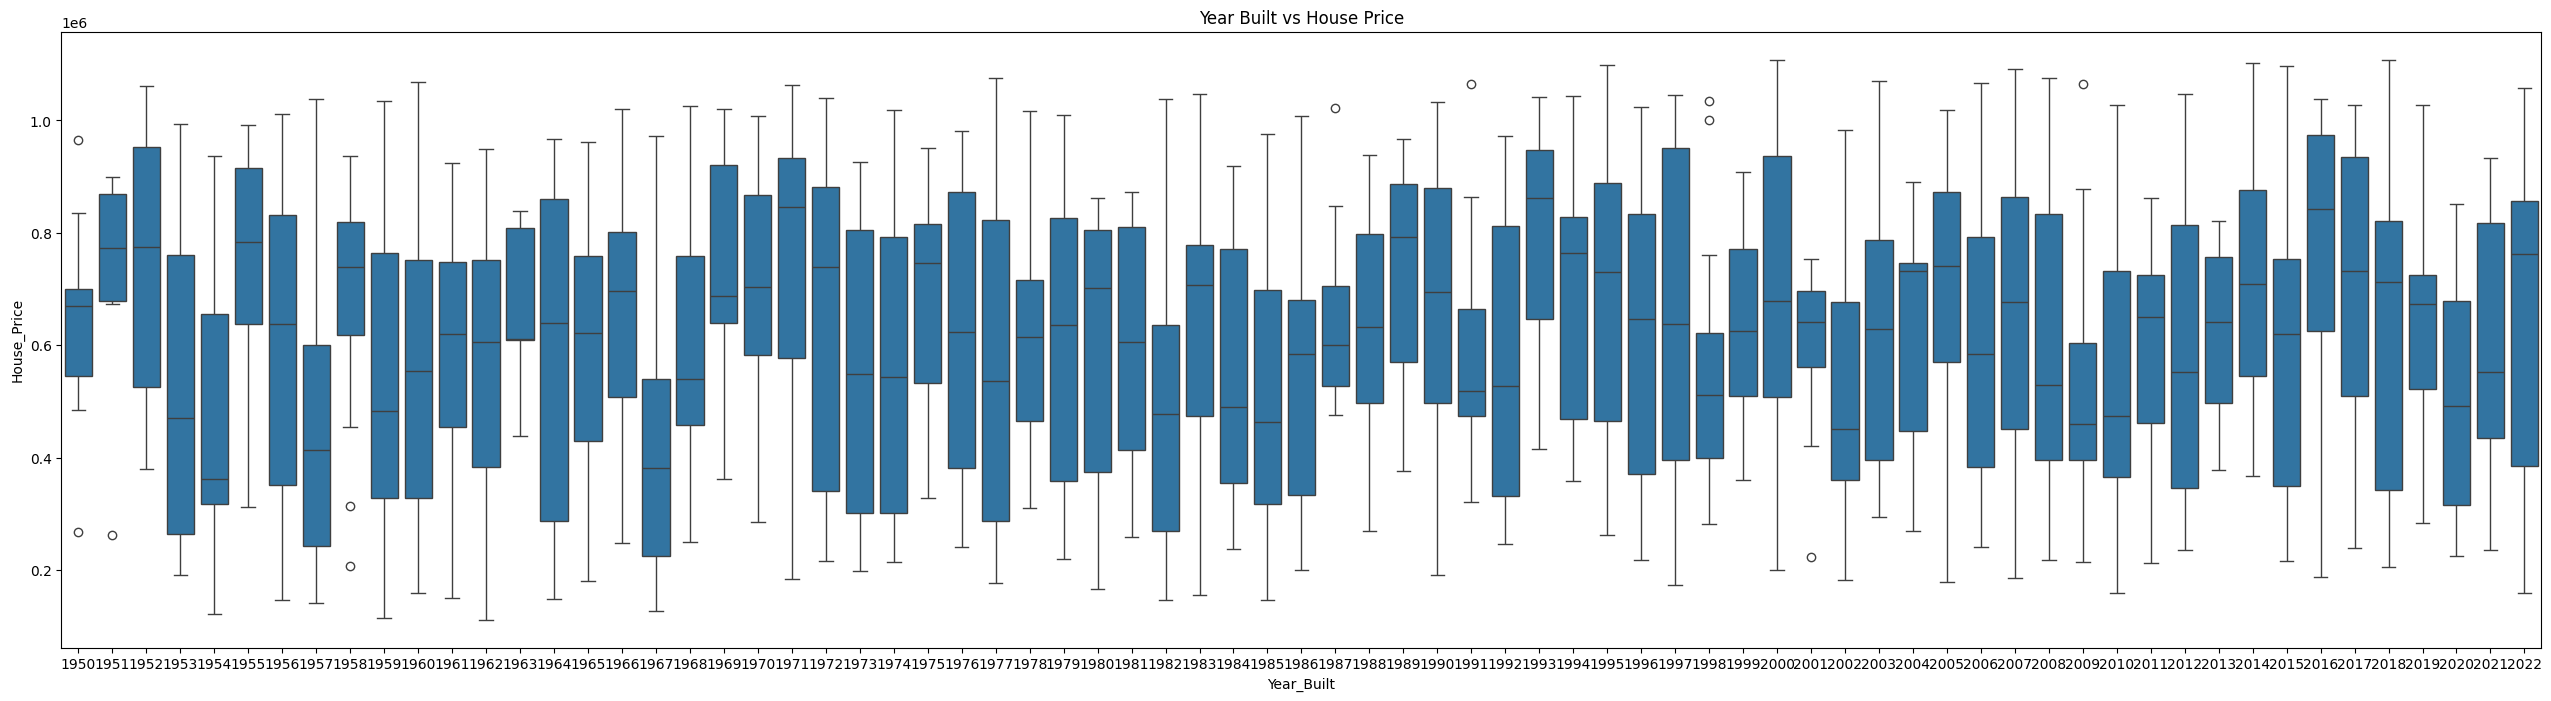

In [ ]:
# Year Built vs House Price
plt.figure(figsize=(32,8))
sns.boxplot(x=data['Year_Built'], y=data['House_Price'])
plt.title('Year Built vs House Price')
plt.show()

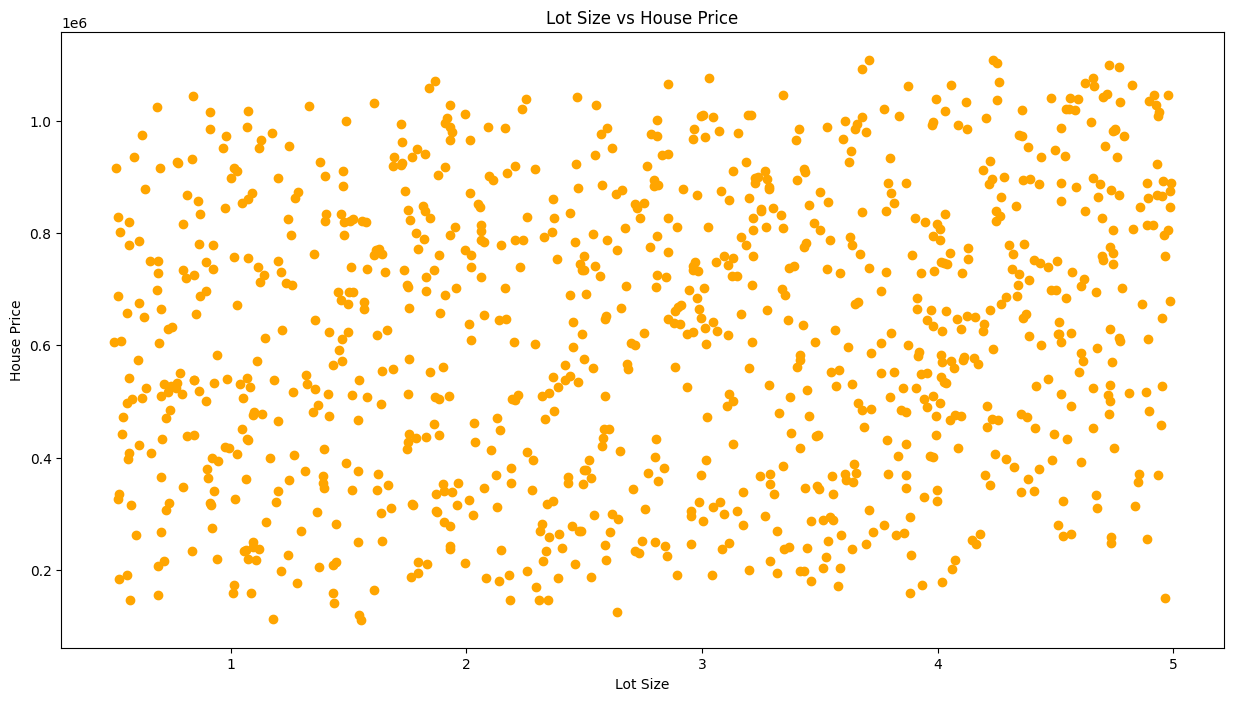

In [ ]:
# Lot Size vs House Price
plt.figure(figsize=(15,8))
plt.scatter(data['Lot_Size'], data['House_Price'],color="orange")
plt.title('Lot Size vs House Price')
plt.xlabel('Lot Size')
plt.ylabel('House Price')
plt.show()

# Data preprocessing

The preprocessing of data is an important step towards unlocks an accurate and high-quality predictive model (Imran et al. 2021). In this particular project the input variables or independent variables include size of the house, number of bedrooms and bathrooms the house has, year that the house was built, size of the lot the house sits on, size of the garage, and the quality of the neighborhood the house is located in and the dependent variable or the output variable is the price of the house.

# Data Cleaning

In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


The first process of data pre-processing was to look out for any missing values in dataset. Where there were missing values, they were either replaced or otherwise, the rows containing them were dropped for model’s sake. In the above code, missing values are being handled, and outliers are identified and removed or replaced, or down played. This clean up deletes or removes any anomalies that would make the model to perform in a particular way, from the dataset. Some of the features such as the size of the lot and the number of bathrooms were observed to have many missing values which could be imputed or dropped as the case maybe. This cleaning process ensures that the collected data is accurate as well as appropriate for model training.

# Machine Learning Models

In [ ]:
X = data.drop('House_Price', axis=1)
y = data['House_Price']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardizing features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Following that, the features were scaled with the help of standardization, as people decided it would be suitable for this way of normalization for Linear Regression model. Standardization assists in scaling all features so that they all fall under one level of analysis making the model more convergent and better (Manasa et al. 2020). The dataset was then divided into training and testing sets so as to facilitate model training and assessment. This increases the model interpretability whilst guaranteeing the models’ robustness through proper preprocessing.

In this project, Linear Regression as well as the Random Forest Regressor was implemented. Nevertheless, an inclusion of other algorithms may afford a better comparison in terms of performance. For example, consideration was given to adding in either the Gradient Boosting Machines (GBM) or the Support Vector Machine (SVM) to compare more model types. When hyperparameters are well-tuned, Gradient Boosting since it uses the ability to add decision trees sequentially based on the errors made by the previous poor-performing trees can be more effective than Random Forests. Further, Support Vector Machines with non-linear kernels could distinguish features that linear regression could not notice (Brownlee 2020).
It then becomes possible to know which model is most suitable for this specific data set – by testing several models. Other techniques like stacking in which an average of different models is taken could also be exercised given that could be significant in incresing the performance of the final model. Furthermore, hyperparameter tuning must be done properly by techniques like grid search, and random search so as to not only train the models but also tune them properly (Zhou et al. 2020).


To predict house prices, two machine learning algorithms were applied: Linear Regression and Random forest Regressor Algorithms.

# Linear Regressor

In [ ]:
# Define the hyperparameters and their possible values for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'normalize': [True, False]       # Whether to normalize the data before fitting (deprecated in newer versions)
}

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Set up GridSearchCV to find the best hyperparameters
grid_search_lr = GridSearchCV(estimator=lin_reg, param_grid=param_grid_lr,
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')

In [ ]:
# Linear Regression Model
y_pred_lr = lin_reg.predict(X_test_scaled)

In [ ]:
print("\nLinear Regression Metrics:")
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr)}")


Linear Regression Metrics:
R2 Score: 0.9984263636823413
Mean Squared Error: 101434798.50563587


Linear Regression is the simplest model because it models the relationship between features and the target as a linear one and, thus is very easy to interpret and very fast. It forms the basis for prediction regarding the number of units to be manufactured.

# Random Forest Regressor

In [ ]:
# Define the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [10, 20, 30, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

In [ ]:
# Random Forest Regressor Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
# Set up GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')

In [ ]:
print("Random Forest Regressor Metrics:")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")

Random Forest Regressor Metrics:
R2 Score: 0.9938855300068556
Mean Squared Error: 394131747.44603425


Random Forest is a more stable ensemble learning method that builds many trees and merges the result of these trees, which can well handle non-linear relationships in the data.

# Testing Prediction

In [ ]:
def get_house_price_prediction():
    # Take inputs for a new house
    square_footage = float(input("Enter Square Footage: "))
    num_bedrooms = int(input("Enter Number of Bedrooms: "))
    num_bathrooms = int(input("Enter Number of Bathrooms: "))
    year_built = int(input("Enter Year Built: "))
    lot_size = float(input("Enter Lot Size (in acres): "))
    garage_size = int(input("Enter Garage Size: "))
    neighborhood_quality = int(input("Enter Neighborhood Quality (1-10): "))

    # Create a DataFrame for the new input
    new_house = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'Num_Bathrooms': [num_bathrooms],
        'Year_Built': [year_built],
        'Lot_Size': [lot_size],
        'Garage_Size': [garage_size],
        'Neighborhood_Quality': [neighborhood_quality]
    })

    # Scale the new input
    new_house_scaled = scaler.transform(new_house)

    # Predict using the model (Random Forest)
    prediction = rf_reg.predict(new_house)

    print(f"Predicted House Price: {prediction[0]:.2f}")

Testing the trained model is important. We are giving inputs for test and got the predicted values.

In [ ]:
# prediction
get_house_price_prediction()

Enter Square Footage: 2500
Enter Number of Bedrooms: 3
Enter Number of Bathrooms: 3
Enter Year Built: 2020
Enter Lot Size (in acres): 0.5
Enter Garage Size: 0
Enter Neighborhood Quality (1-10): 8
Predicted House Price: 538063.32


Results from the trained Random Forest Model

# Final discussion on the overall pipeline

The proposed pipeline presents a firm solution to the business problem by using an enhanced model of feature extraction and utilising features to take actionable decisions. One of the main benefits is the possibility of improving the data handling process, the acquisition of the required information that will have to be processed and analysed. However there are limitations which might be assessed in terms of the size and/or quality of the data set which is used for model building. As a result of the findings, the usefulness of the this solution for decision making in the business can be clearly seen as a way to have better strategies in place that will be rooted on facts.

Some of the suggestion include; enhancement of the model either by supplying the model with new data or enhance on features that would help increase on the precision and the modulation. Further, the use of feedback loop could also introduce certain level of improvement over time. The most relevant features in the model would, probably, be those that have a direct influence on the business issue at hand, for example, pricing, customers’ behaviour, or supply chain elements. Model explainability is still crucial as a nicely explained model establishes trust between the decision makers and stakeholders while also enabling the latter to make decisions confidently based on the process that is followed by the model.

# Conclusion


On comparing the Linear Regression and Random Forest models after training both models, it is possible to observe that each model has its peculiarities. Linear Regression for instance is the most appropriate when the relationship between the features and the target variable is linear. However, as highlighted earlier on, the prices of real estate are not always linear and this explains why the Random Forest model outperforms the linear model. Thus, gaining from multiple decision trees, the Random Forest model does not overlook interactions between features, which are not considered by linear models. However, there are some drawbacks of the Random Forest model mentioned below. This method has, however, two main concerns: First, it only finds the best solution given by the model, and second, it is a black-box algorithm. Often this could be a problem in sensitive industries such as real estate where it is inevitable that the results of predictive analytics will have to be transparent and explainable due to the requirements of clients. In contrast, the examples like SHAP values or LIME (Local Interpretable Model-agnostic Explanations) can be implemented into the model to enhance interpretability alongside with prediction accuracy (Lundberg and Lee 2017). there is more than one advantage of accurately solving this business problem of predicting house prices.

At First, it increases the satisfaction of the customers through offering realistic price ranges to the buyers. Second, it could assist the company in maintaining profit since there are chancy financial risks in either pricing properties too high or too low. As future work, it will be possible to incorporate more complex algorithms, for instance, neural networks, as well as to integrate the use of methods that would allow the Random Forest to be more explainable.
By utilizing Linear Regression and Random Forest Regressor the result is a complete solution to offer an accurate prediction of the house prices for the real estate pricing problem at hand. I really like that this pipeline is suitable for linear and nonlinear data relationships between features and house prices, respectively. Linear Regression provides ease and interpretableness which can make it easy to know how various features affect the prices. Random Forest improves the model as it provides a better way of identifying complicated patterns and interaction terms that linear type models may not uncover. However, the solution comes with certain restrictions. Linear Regression might fail in the presence of non-linearity, while Random Forest, even though is a very strong algorithm, is less transparent and may be computationally expensive. The implications for the business are significant: Ideal price forecasting helps avoid the tendency of over or underpricing of the properties, the prices of which affects their market value. Examples of such hypotheses are concentrating on the features that turned out to be the most valuable, namely area, the quality of a neighborhood, and the size of the plot, all of which are currently closely connected with house prices.


# Reference List

Journals
Imran, I., Zaman, U., Waqar, M. and Zaman, A., 2021. Using machine learning algorithms for housing price prediction: the case of Islamabad housing data. Soft Computing and Machine Intelligence, 1(1), pp.11-23.
Jamil, S., Mohd, T., Masrom, S. and Ab Rahim, N., 2020, July. Machine learning price prediction on green building prices. In 2020 IEEE symposium on industrial electronics & applications (ISIEA) (pp. 1-6). IEEE.
Manasa, J., Gupta, R. and Narahari, N.S., 2020, March. Machine learning based predicting house prices using regression techniques. In 2020 2nd International conference on innovative mechanisms for industry applications (ICIMIA) (pp. 624-630). IEEE.
Mora-Garcia, R.T., Cespedes-Lopez, M.F. and Perez-Sanchez, V.R., 2022. Housing price prediction using machine learning algorithms in COVID-19 times. Land, 11(11), p.2100.
Shahhosseini, M., Hu, G. and Pham, H., 2020. Optimizing ensemble weights for machine learning models: a case study for housing price prediction. In Smart Service Systems, Operations Management, and Analytics: Proceedings of the 2019 INFORMS International Conference on Service Science (pp. 87-97). Springer International Publishing.
Truong, Q., Nguyen, M., Dang, H. and Mei, B., 2020. Housing price prediction via improved machine learning techniques. Procedia Computer Science, 174, pp.433-442.
Chen, T. and Guestrin, C., 2016. Xgboost: A scalable tree boosting system. In Proceedings of the 22nd ACM SIGKDD international conference on knowledge discovery and data mining (pp. 785-794).
Jolliffe, I.T., and Cadima, J., 2016. Principal component analysis: a review and recent developments. Philosophical Transactions of the Royal Society A, 374(2065), pp.20150202.
Shen, X., Yin, F. and Jiao, C., 2023. Predictive models of life satisfaction in older people: A machine learning approach. International Journal of Environmental Research and Public Health, 20(3), p.2445.
Zhao, S., Li, W., Zhao, K. and Zhang, P., 2021. Change Characteristics and Multilevel Influencing Factors of Real Estate Inventory—Case Studies from 35 Key Cities in China. Land, 10(9), p.928.
